In [49]:
from IPython.display import Javascript as js, clear_output
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
from IPython.display import IFrame
import matplotlib.pyplot as plt
import matplotlib.colorbar
import matplotlib as mpl
import geopandas as gpd
import networkx as nx
import osmnx as ox


In [4]:
def speak(text):
    # Escape single quotes
    text = text.replace("'", r"\'")
    display(js(f'''
    if(window.speechSynthesis) {{
        var synth = window.speechSynthesis;
        synth.speak(new window.SpeechSynthesisUtterance('{text}'));
    }}
    '''))
    # Clear the JS so that the notebook doesn't speak again when reopened/refreshed
    clear_output(False)

In [5]:
Boston_graph = ox.graph_from_address("700 Boylston Street, Boston", distance=1500, simplify=True, network_type='drive')
Boston_graph

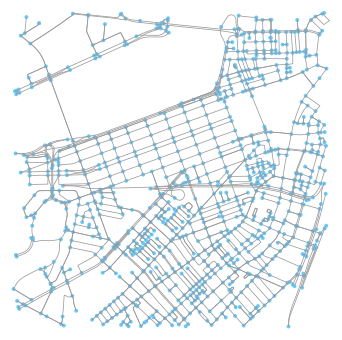

In [6]:
fig, ax = ox.plot_graph(Boston_graph, edge_linewidth=0.75, fig_height=6, fig_width=7)
plt.show()

In [7]:
m = ox.plot_graph_folium(Boston_graph, popup_attribute='name', edge_width = 1.5)
m

In [8]:
Grap = ox.graph_from_address("700 Boylston Street, Boston", distance=7000, simplify=True, network_type='walk')
gdf_nodes = ox.graph_to_gdfs(Grap, edges=False)
nearest_node = ox.get_nearest_node(Grap, point=(42.349396,-71.078369))
G = ox.project_graph(Grap)

In [9]:
times = [5, 15, 30, 45, 60]
travel_speed = 4.5
ms_minute = travel_speed * 1000 / 60

for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / ms_minute

In [57]:
iso_colors = ox.get_colors(n=len(times), cmap='Greens', start=0.3, return_hex=True)
node_colors = {}
for time, color in zip(sorted(times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, nearest_node, radius=time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]


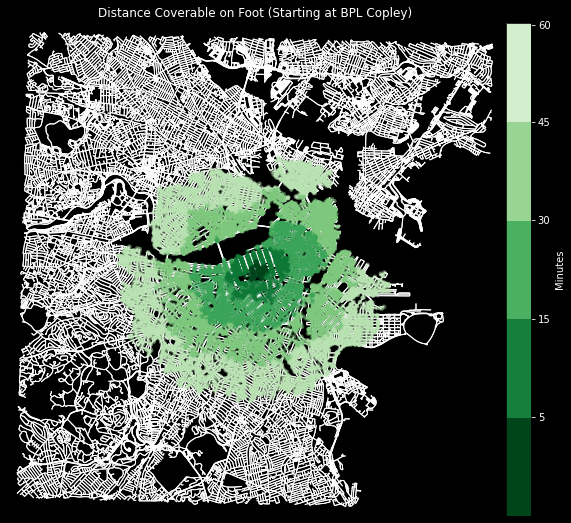

In [99]:
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.5, node_zorder=2, bgcolor='black', edge_color='white', show=False, close=False)
ax.set_title('Distance Coverable on Foot (Starting at BPL Copley)', color='white')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

x = np.array([times])

cmap = plt.cm.get_cmap('Greens', 6)
cmap_list = [cmap(0.3), cmap(0.44), cmap(0.58), cmap(0.72), cmap(0.86)]
cmap_list.reverse()
cmap = mpl.colors.ListedColormap(cmap_list)


ticnames = [str(i) for i in times]
custom = plt.cm.get_cmap('Greens', 6).reversed()

im = ax.imshow(x, cmap=cmap)
cb = plt.colorbar(im, cax=cax)

loc = np.asarray([16, 27, 38, 49, 59.8])# + 0.5
im.axes.tick_params(color='white', labelcolor='white')

cb.set_ticks(loc)
cb.ax.set_yticklabels(ticnames)
cb.set_label('Minutes', color='white')
cb.ax.yaxis.set_tick_params(color='white')

plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
plt.getp(cb.ax.axes, 'yticklabels')

plt.tight_layout()
plt.savefig('map1', figsize=(19.20,10.80), facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()
#plt.savefig('map.png')

In [24]:
fig.suptitle('Distance Coverable by Foot')
plt.show()

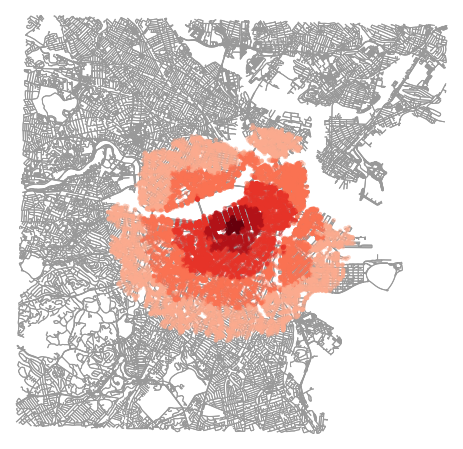

In [13]:
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.5, node_zorder=2)

In [45]:
isochrone_polys = []
for trip_time in sorted(times, reverse=True):
    subgraph = nx.ego_graph(G, nearest_node, radius = trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

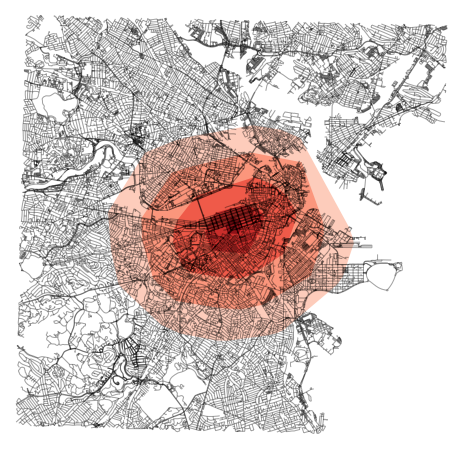

In [46]:
fix, ax = ox.plot_graph(G, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [ ]:
plt.title('')

In [47]:
speak('Your notebook is finished running')